In [31]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from themodel import ConvSeq
model = ConvSeq()
model.load_state_dict(torch.load('models/201907130244model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [34]:
from thedataset import brats3dDataset
dataset = brats3dDataset('ignore/data/numpyData32')

In [38]:
ITEM = 7
x,y = dataset.__getitem__(ITEM)
x = x.unsqueeze(0)
y = y.unsqueeze(0)
model.eval()
y_pred = model(x)
y_pred = torch.sigmoid(y_pred).round()

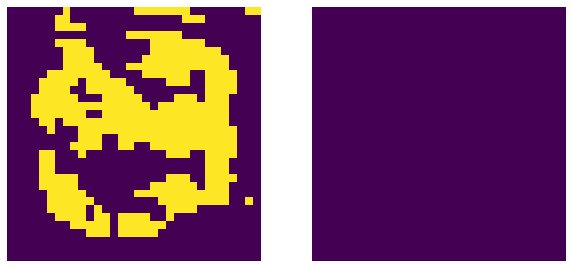

In [48]:
SLICE = 26
npy = y.numpy()[0,:,:,SLICE]
npy_pred = y_pred.cpu().detach().numpy()[0,:,:,SLICE]

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.axis('off')
plt.imshow(npy_pred)

plt.subplot(122)
plt.axis('off')
plt.imshow(npy)

plt.show()